**Scope of the analysis**

I am dedicating this notebook to the greatest raptor of all Time, Kyle Lowry. I want to explore Kyle’s performance and if it is possible to predict Kyles PPG and AST.

**Web Scraping**

To get our data , I built a small web scrapper to get the data from espn. 



In [1]:
import requests
import pandas as pd
from bs4 import BeautifulSoup
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from scipy.stats import pearsonr
from scipy.stats import f_oneway
from statsmodels.stats.multicomp import MultiComparison
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import math

#Current Year, 2020
#url = 'https://www.espn.com/nba/player/gamelog/_/id/3012/kyle-lowry'

#2019
url = 'https://www.espn.com/nba/player/gamelog/_/id/3012/type/nba/year/2019'

#2018
#url = 'https://www.espn.com/nba/player/gamelog/_/id/3012/type/nba/year/2018'


soup = BeautifulSoup(requests.get(url).content, 'html.parser')
columns = ['Date','OPP','Result','MIN','FG','FG%','3PT','3P%','FT','FT%','REB','AST','BLK','STL','PF','TO', 'PTS']

all_data = []
for row in soup.select('.Table__TR'):
    tds = [td.get_text(strip=True, separator=' ') for td in row.select('.Table__TD')]
    if len(tds) != 17:
        continue
    all_data.append(tds)

df = pd.DataFrame(all_data, columns=columns)




In [2]:
df.info()
df.dtypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93 entries, 0 to 92
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    93 non-null     object
 1   OPP     93 non-null     object
 2   Result  93 non-null     object
 3   MIN     93 non-null     object
 4   FG      93 non-null     object
 5   FG%     93 non-null     object
 6   3PT     93 non-null     object
 7   3P%     93 non-null     object
 8   FT      93 non-null     object
 9   FT%     93 non-null     object
 10  REB     93 non-null     object
 11  AST     93 non-null     object
 12  BLK     93 non-null     object
 13  STL     93 non-null     object
 14  PF      93 non-null     object
 15  TO      93 non-null     object
 16  PTS     93 non-null     object
dtypes: object(17)
memory usage: 12.5+ KB


Date      object
OPP       object
Result    object
MIN       object
FG        object
FG%       object
3PT       object
3P%       object
FT        object
FT%       object
REB       object
AST       object
BLK       object
STL       object
PF        object
TO        object
PTS       object
dtype: object

> **Read the data**

doing some basic changing of data types and previewing some of the data.


In [3]:
df.PTS = pd.to_numeric(df.PTS)
df.AST = pd.to_numeric(df.AST)
df.MIN = pd.to_numeric(df.MIN)
df.head()


,Date,OPP,Result,MIN,FG,FG%,3PT,3P%,FT,FT%,REB,AST,BLK,STL,PF,TO,PTS
0,Thu 6/13,@ GS,W 114-110,42,9-16,56.3,4-7,57.1,4-6,66.7,7,10,0,3,5,3,26
1,Mon 6/10,vs GS,L 106-105,42,8-16,50.0,1-6,16.7,1-2,50.0,4,6,2,1,4,2,18
2,Fri 6/7,@ GS,W 105-92,37,3-12,25.0,0-4,0.0,4-4,100.0,2,7,0,3,4,2,10
3,Wed 6/5,@ GS,W 123-109,43,8-16,50.0,5-9,55.6,2-2,100.0,4,9,1,1,3,3,23
4,Sun 6/2,vs GS,L 109-104,28,4-11,36.4,3-7,42.9,2-3,66.7,1,2,0,1,6,2,13


Fistly, we display a scatterplot of the MIN vs PTS which also fits a linear model where the MIN acts as the independent variable(the variable we will be changing) and the PTS as the dependent variable(dependent on MIN, we are measuring PTS).

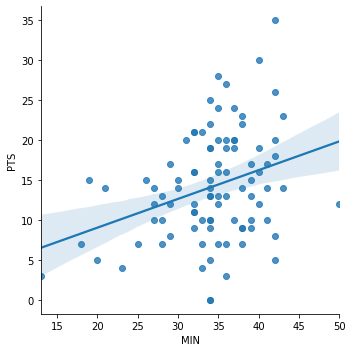

In [4]:
sns.lmplot(x="MIN", y="PTS", data=df)
plt.show()

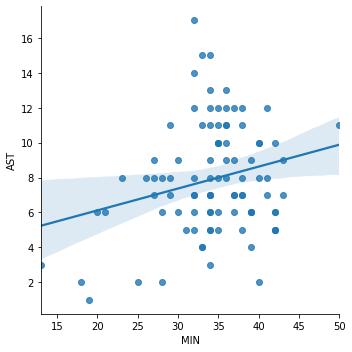

In [5]:
sns.lmplot(x="MIN", y="AST", data=df)
plt.show()

In [6]:
print('Kyle Lowry Mean Points is %.3f' % df['PTS'].mean())

Kyle Lowry Mean Points is 14.161


In [7]:
X = df[['MIN']]
Y = df[['PTS']]
#df = pd.get_dummies(df)

# Build linear regression model
lr_model = LinearRegression(fit_intercept=True, normalize=False)
lr_model.fit(X, Y)
sc = lr_model.score(X, Y)
print('R2 score: %.3f' % sc)

R2 score: 0.104


In [8]:
y_pred = lr_model.predict(X)
rmse = math.sqrt(mean_squared_error(Y, y_pred))
print('Root Mean Square Error is %.3f. Data STD is %.3f' % (rmse, Y.std()))

Root Mean Square Error is 6.340. Data STD is 6.735


**Pearson Correlation Coefficient**

a measure of the linear association between two variables X and Y. It has a value between -1 and 1 .

In [9]:
# Calculate Pearson correlation coefficient between the two variables
corr, _ = pearsonr(df['PTS'], df['AST'])
print('Pearson correlation coefficient: %.3f' % corr)

Pearson correlation coefficient: 0.072


Not really close to one here, meaning no association between the two. Curios to try PTS and MINS

In [21]:
# Calculate Pearson correlation coefficient between the two variables, PTS and MITS
corr, _ = pearsonr(df['PTS'], df['MIN'])
print('Pearson correlation coefficient: %.3f' % corr)

Pearson correlation coefficient: 0.323


Perfect Correlation is 1, so this is somewhat corellated.

In [22]:
# Calculate Pearson correlation coefficient between the two variables, AST and MIN
corr, _ = pearsonr(df['AST'], df['MIN'])
print('Pearson correlation coefficient: %.3f' % corr)

Pearson correlation coefficient: 0.239


Less correlated then PTS is!

**Selecting Data for modelling**

In [10]:
df.columns

Index(['Date', 'OPP', 'Result', 'MIN', 'FG', 'FG%', '3PT', '3P%', 'FT', 'FT%',
       'REB', 'AST', 'BLK', 'STL', 'PF', 'TO', 'PTS'],
      dtype='object')

Selecting prediction Target!  We want to Predict Points or PPG. We will name this y.

In [11]:
y = df.PTS

Features! I will choose features that seem to have an affect on PPG, such as Minutes, FG%, TO, etc.

In [12]:
lowry_features = ['MIN','FG%','3P%','FT%','TO']
X = df[lowry_features]

Lets checkout X

In [13]:
X.describe()

,MIN
count,93.000000
mean,34.225806
std,6.034555
min,13.000000
25%,32.000000
50%,35.000000
75%,38.000000
max,50.000000


In [14]:
X.head()

,MIN,FG%,3P%,FT%,TO
0,42,56.3,57.1,66.7,3
1,42,50.0,16.7,50.0,2
2,37,25.0,0.0,100.0,2
3,43,50.0,55.6,100.0,3
4,28,36.4,42.9,66.7,2


In [15]:
lowry_model = DecisionTreeRegressor(random_state=1)
lowry_model.fit(X, y)
print("Making predictions for the following 5 stat lines:")
print(X.head())
print("The predictions are")
print(lowry_model.predict(X.head()))

Making predictions for the following 5 stat lines:
   MIN   FG%   3P%    FT% TO
0   42  56.3  57.1   66.7  3
1   42  50.0  16.7   50.0  2
2   37  25.0   0.0  100.0  2
3   43  50.0  55.6  100.0  3
4   28  36.4  42.9   66.7  2
The predictions are
[26. 18. 10. 23. 13.]


Kind of makes sense as you see the predictions of Points are higher when MIN , FG%, 3p%, are better.

In [16]:
y.head()

0    26
1    18
2    10
3    23
4    13
Name: PTS, dtype: int64

In [17]:
predicted_points = lowry_model.predict(X)
mean_absolute_error(y, predicted_points)

0.0

WHY IS MAE 0!

In [18]:
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state = 0)
lowry_model = DecisionTreeRegressor()
lowry_model.fit(train_X, train_y)
pts_predictions = lowry_model.predict(val_X)
print(mean_absolute_error(val_y, pts_predictions))


4.083333333333333


In Mean absolute Error is 0, Out Mean absolute error is 4.